In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split

In [2]:
df_female="/kaggle/input/gender-classification-from-an-image/gender/consolidated/female"
new_df_female=[]
for cur,diri,filename in os.walk(df_female):
    for file in filename:
        data=os.path.join(cur,file)
        cv=cv2.imread(data)
        if cv is not None:
            cv3=cv2.resize(cv,(224,224))
            new_df_female.append(cv3)
new_df_female=np.array(new_df_female)       

In [3]:
new_df_female.shape

(1947, 224, 224, 3)

In [4]:
lf=[]
for _ in range(len(new_df_female)):
    f=0
    lf.append(0)
lf=np.array(lf)
len(lf)

1947

In [5]:
df_male="/kaggle/input/gender-classification-from-an-image/gender/consolidated/male"
new_df_male=[]
for cur,diri,filename in os.walk(df_male):
    for file in filename:
        data=os.path.join(cur,file)
        cv=cv2.imread(data)
        if cv is not None:
            cv3=cv2.resize(cv,(224,224))
            new_df_male.append(cv3)
new_df_male=np.array(new_df_male)              

In [6]:
new_df_male.shape

(1944, 224, 224, 3)

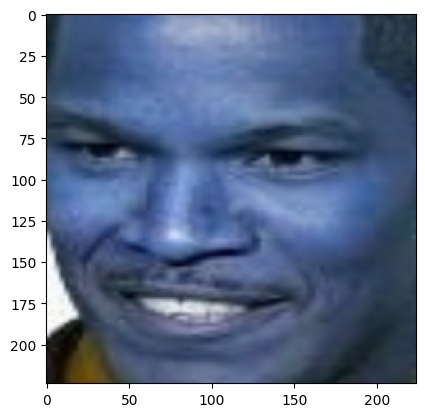

In [7]:
plt.imshow(new_df_male[0])
plt.show()

In [8]:
lm=[]
for _ in range(len(new_df_male)):
    m=1
    lm.append(m)
lm=np.array(lm)
lm

array([1, 1, 1, ..., 1, 1, 1])

In [9]:
# len(new_df)

In [10]:
new_df=np.concatenate([new_df_female,new_df_male],axis=0)
new_label=np.concatenate([lf,lm],axis=0)

In [11]:
new_label

array([0, 0, 0, ..., 1, 1, 1])

In [12]:
new_df.shape

(3891, 224, 224, 3)

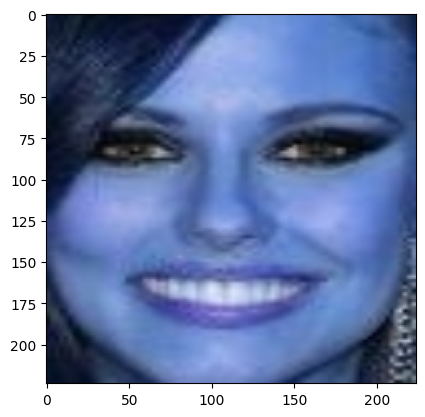

In [13]:
plt.imshow(new_df[300])
plt.show()

In [14]:
print(len(new_label))
len(new_df)

3891


3891

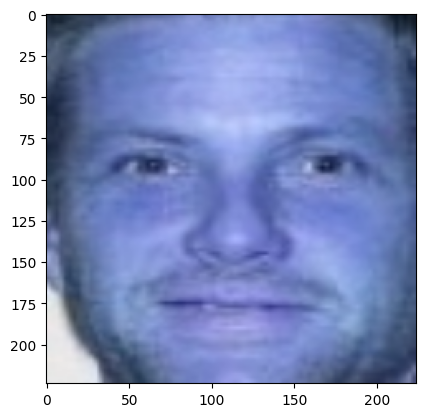

In [15]:
plt.imshow(new_df[2001])
plt.show()

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(new_df,new_label,random_state=42)

In [38]:
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,Input
from keras.models import Model
from keras.callbacks import EarlyStopping

In [39]:
early_stopping=EarlyStopping(
monitor="val_loss",
patience=5,
verbose=1)

In [46]:
inputs = Input(shape=(224, 224, 3))

conv1 = Conv2D(32, (3, 3), activation="relu", padding="same")(inputs)
conv1 = Conv2D(64, (3, 3), activation="relu", padding="same")(conv1)
maxp1 = MaxPooling2D((2, 2))(conv1)


drop2 = Dropout(0.5)(maxp1)
flat = Flatten()(drop2)

dense2 = Dense(128, activation="relu")(flat)
drop3 = Dropout(0.5)(dense2)
dense3 = Dense(32, activation="relu")(drop3)
outputs = Dense(1, activation="sigmoid")(dense3)
model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [47]:
# model.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])

In [55]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras import Input

inputs = Input(shape=(224, 224, 3))
# Example of a simple convolutional model
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
# More convolutional layers, pooling, etc.
# ...
flat = Flatten()(conv1)
dense1 = Dense(128, activation='relu')(flat)
outputs = Dense(1, activation='sigmoid')(dense1)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [56]:
model.fit(X_train,Y_train,epochs=100,batch_size=32,validation_data=(X_test,Y_test),callbacks=[early_stopping])

Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 16s 129ms/step - accuracy: 0.5845 - loss: 6775.1914 - val_accuracy: 0.7379 - val_loss: 20.2650
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.8272 - loss: 9.8177 - val_accuracy: 0.8407 - val_loss: 8.0103
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.8275 - loss: 8.3400 - val_accuracy: 0.7215 - val_loss: 17.6958
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.8108 - loss: 10.7689 - val_accuracy: 0.8201 - val_loss: 7.7666
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.8845 - loss: 3.5022 - val_accuracy: 0.8407 - val_loss: 5.3536
Epoch 5: early stopping


In [69]:
loss, accuracy = model.evaluate(X_test, Y_test)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8557 - loss: 4.6577


In [57]:
y_pred=model.predict(X_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


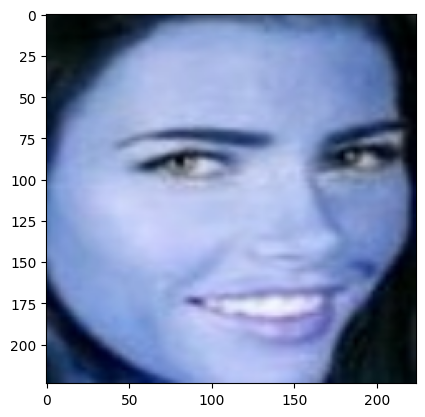

In [71]:
plt.imshow(X_test[301])
plt.show()

In [67]:
y_pred[301]

array([0.], dtype=float32)

In [72]:
# y_pred

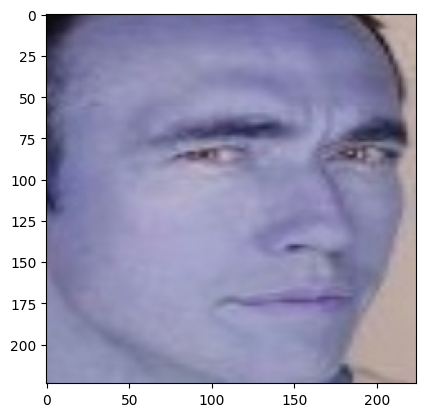

In [32]:
plt.imshow(X_test[600])
plt.show()

In [33]:
y_pred[600]
# plt.show()

array([0.5014254], dtype=float32)

In [75]:
inputs = Input(shape=(224, 224, 3))
# Example of a simple convolutional model
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
# More convolutional layers, pooling, etc.
# ...
flat = Flatten()(conv1)

outputs = Dense(1, activation='sigmoid')(flat)

model2 = Model(inputs, outputs)
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [76]:
model2.fit(X_train,Y_train,epochs=100,batch_size=32,validation_data=(X_test,Y_test),callbacks=[early_stopping])

Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.5507 - loss: 2483.8691 - val_accuracy: 0.7050 - val_loss: 7.0862
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7571 - loss: 5.4820 - val_accuracy: 0.7328 - val_loss: 3.1891
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8193 - loss: 2.0609 - val_accuracy: 0.7544 - val_loss: 2.9231
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8660 - loss: 1.0990 - val_accuracy: 0.7677 - val_loss: 2.0755
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8763 - loss: 0.8767 - val_accuracy: 0.7492 - val_loss: 2.0992
Epoch 5: early stopping
